In [1]:
data_path = '../data/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import scipy 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

## Functions

In [13]:
def kmeans(df, k = 3,):
    '''
    this function performs kmeans clustring, draws elbow method, plots classes count, plots tsne
    '''
    kmeans = KMeans(n_clusters= k, max_iter=500).fit(df)
    labels = kmeans.labels_
    
    intertia = []
    for i in range(1,30):
        km = KMeans(n_clusters=i).fit(df)
        intertia.append(km.inertia_)
    
    # plotting within class inertia (elbo method)
    fig, axs = plt.subplots(nrows= 1, ncols=2, figsize=(14,8))
    axs[0].plot(range(1,30), intertia, marker = 'x')
    axs[0].set_title('Elbow method', fontsize = 14, color = 'r')
    axs[0].set_xlabel('Components', fontsize = 12, color = 'r')
    axs[0].set_ylabel('Intertia', fontsize = 12, color = 'r')
    axs[0].set_xticks(range(1,30));
    
    # plotting the classes count
    
    sns.countplot(x = labels,palette='viridis', ax= axs[1])
    plt.xlabel('K-means Clusters',fontsize = 12, color = 'r')
    plt.title('count per class', fontsize = 14, color = 'r');
    
    return labels

In [14]:
def dbscan(df, eps, min_samples = 30):
    dbscan = DBSCAN(eps = eps, min_samples= min_samples).fit(df)
    dblabels = dbscan.labels_
    
    #plot dbscan clusters count
    sns.countplot(x = dblabels)
    # plt.xticks(['noise','0','1','2','3'])
    plt.xlabel('clusters' , fontsize = 14);
    return dblabels

In [15]:
def pca(df, n = 10,scale = True,):
    if scale:
        df = Normalizer().fit_transform(df)
        
    pca = PCA(n)
    n_data = pca.fit_transform(df)
    # ploting the explained varianec
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    plt.plot(np.arange(1,len(cumsum)+1), cumsum,  marker= 'o')
    plt.xticks(np.arange(1,len(cumsum)+1))
    plt.axhline(y = cumsum[-1], color = 'r')
    plt.text(x = 2,y = cumsum[-1] -.0523 , s = 'exp-var =  {:.3}'.format(cumsum[-1]), fontdict={'color':'b','fontsize':12})
    plt.title('pca components vs explained variance', fontsize = 16, color = 'r')
    plt.xlabel('N-Components',fontsize = 14, color = 'r')
    plt.ylabel('Explained Variance',fontsize = 14,color = 'r' );
   
    return n_data

In [3]:
def anomaly(df, cont = .11, max_features = 2, n_estimators = 100):
    If = IsolationForest(n_estimators= n_estimators, max_features= max_features, contamination= cont)
    If.fit(df)
    labels = If.predict(df)
    return labels

In [4]:
df = pd.read_csv(data_path+ 'log_data.csv', index_col= 'CUST_ID')

In [5]:
labels = anomaly(df, cont= .15, max_features= 1)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [6]:
tsne_data = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(df)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot:>

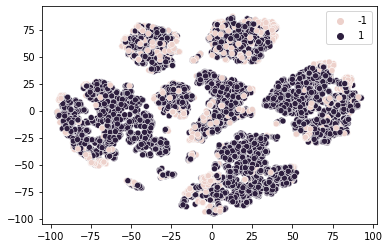

In [7]:
sns.scatterplot(x = tsne_data[:,0], y = tsne_data[:,1], hue = labels, )

In [8]:
def remove_anom(df,labels):
    df_n = df[labels != -1].copy()
    n_labels = labels[labels != -1]
    return df_n, n_labels

In [9]:
df_new , n_labels= remove_anom(df,labels)

In [10]:
tsne_data2 = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(df_new)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


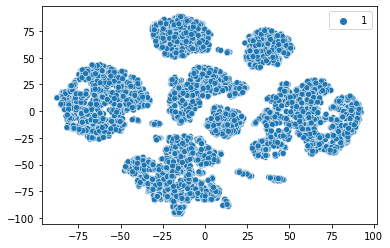

In [11]:
sns.scatterplot(x = tsne_data2[:,0], y = tsne_data2[:,1], hue = n_labels );

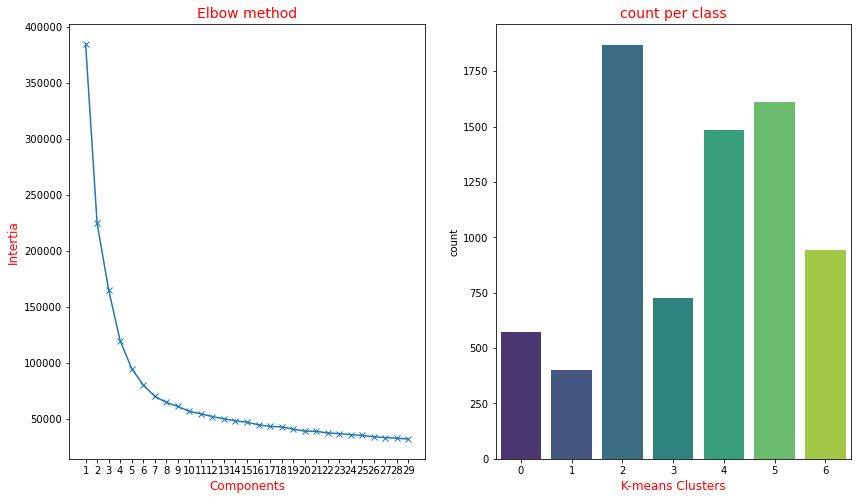

In [16]:
km_labels  = kmeans(df_new, k = 7)

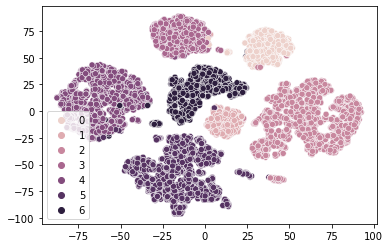

In [17]:
sns.scatterplot(x = tsne_data2[:,0], y = tsne_data2[:,1], hue = km_labels );

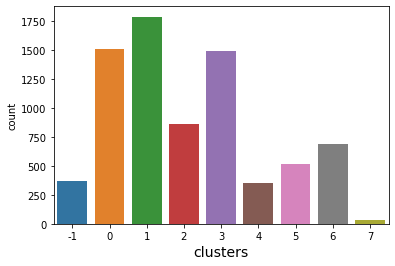

In [29]:
db_labels = dbscan(df_new,eps = 2.1, min_samples= 25)

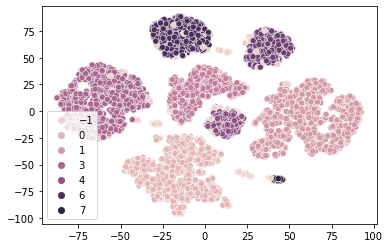

In [30]:
sns.scatterplot(x = tsne_data2[:,0], y = tsne_data2[:,1], hue = db_labels );

In [34]:
test_df, test_labels = remove_anom(df_new, db_labels)

### using dbscan to remove the noise left after isolated forests

In [35]:
tsne_data3 = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(test_df)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


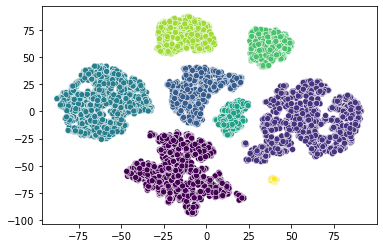

In [37]:
sns.scatterplot(x = tsne_data3[:,0], y = tsne_data3[:,1], c = test_labels );

___

### Appling PCA

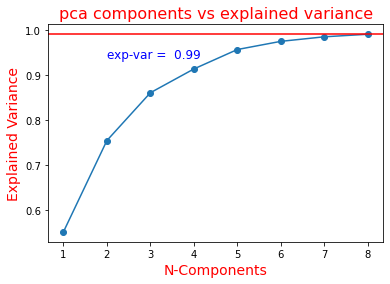

In [90]:
pca_df = pca(df, n= 8)

In [104]:
labels = anomaly(pca_df, cont= .13, max_features= 2)

In [92]:
tsne_pca_data = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(pca_df)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


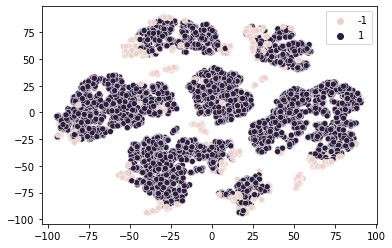

In [105]:
sns.scatterplot(x = tsne_pca_data[:,0], y = tsne_pca_data[:,1], hue = labels, );

In [107]:
df_new , n_labels= remove_anom(tsne_pca_data,labels)

In [108]:
tsne_clear_data = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(df_new)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


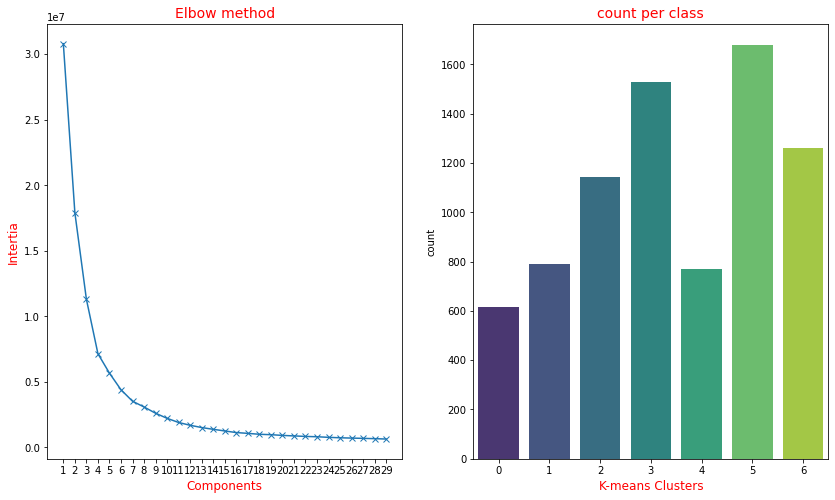

In [109]:
km_labels  = kmeans(df_new, k = 7)

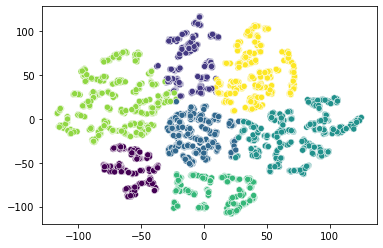

In [110]:
sns.scatterplot(x = tsne_clear_data[:,0], y = tsne_clear_data[:,1], c = km_labels, );

### I used isolated forest to remove outliers but still some noise were affecting the clustring giving rise to extra clusters containes few observations if i increase contamination it only removes large number of observations
### using dbscan to remvoe the noise gives smooth clusters